In [1]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [2]:
import requests
from PIL import Image
from io import BytesIO

import copy


In [3]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np
import torch.nn.functional as F
from PIL import Image
import os
import PIL
import glob
import random

# Reading the image database and associate a number between 0 to 61 for the all digits (0-9) and characters(A-Z, a-z)

In [5]:
Dataset_Feature = np.zeros((3410,1,28,28)) 
Dataset_y = np.zeros((3410),dtype = int)  
cnt = 0
for i in range(1,3411):
    image = mpimg.imread("./Img/"+str(i)+'.png')
    lina_gray = color.rgb2gray(image)
    Dataset_Feature[i-1][0] = torch.tensor(lina_gray)
    Dataset_y[i-1] = cnt
    if(i % 55 == 0):
      cnt = cnt + 1  
    


In [6]:
def character_print(x):
    if(x == 0):
        char = "0"
    elif(x == 1):
        char = "1"
    elif(x == 2):
        char = "2"            
    elif(x == 3):
        char = "3"
    elif(x == 4):
        char = "4"            
    elif(x == 5):
        char = "5"
    elif(x == 6):
        char = "6"            
    elif(x == 7):
        char = "7"
    elif(x == 8):
        char = "8"            
    elif(x == 9):
        char = "9"
    elif(x == 10):
        char = "A"            
    elif(x == 11):
        char = "B"
    elif(x == 12):
        char = "C"            
    elif(x == 13):
        char = "D"
    elif(x == 14):
        char = "E"            
    elif(x == 15):
        char = "F"
    elif(x == 16):
        char = "G"             
    elif(x == 17):
        char = "H"
    elif(x == 18):
        char = "I"            
    elif(x == 19):
        char = "J"
    elif(x == 20):
        char = "K"            
    elif(x == 21):
        char = "L"
    elif(x == 22):
        char = "M"            
    elif(x == 23):
        char = "N"
    elif(x == 24):
        char = "O"            
    elif(x == 25):
        char = "P"
    elif(x == 26):
        char = "Q"            
    elif(x == 27):
        char = "R"
    elif(x == 28):
        char = "S"            
    elif(x == 29):
        char = "T"
    elif(x == 30):
        char = "U"            
    elif(x == 31):
        char = "V"
    elif(x == 32):
        char = "W"            
    elif(x == 33):
        char = "X"
    elif(x == 34):
        char = "Y"            
    elif(x == 35):
        char = "Z"
    elif(x == 36):
        char = "a"            
    elif(x == 37):
        char = "b"
    elif(x == 38):
        char = "c"            
    elif(x == 39):
        char = "d"
    elif(x == 40):
        char = "e"            
    elif(x == 41):
        char = "f"
    elif(x == 42):
        char = "g"            
    elif(x == 43):
        char = "h"
    elif(x == 44):
        char = "i"            
    elif(x == 45):
        char = "j"
    elif(x == 46):
        char = "k"            
    elif(x == 47):
        char = "l"
    elif(x == 48):
        char = "m"             
    elif(x == 49):
        char = "n"
    elif(x == 50):
        char = "o"            
    elif(x == 51):
        char = "p"
    elif(x == 52):
        char = "q"            
    elif(x == 53):
        char = "r"
    elif(x == 54):
        char = "s"            
    elif(x == 55):
        char = "t"
    elif(x == 56):
        char = "u"            
    elif(x == 57):
        char = "v"
    elif(x == 58):
        char = "w"            
    elif(x == 59):
        char = "x"
    elif(x == 60):
        char = "y"            
    elif(x == 61):
        char = "z"    
    return char

# Splitting the image database to two randomly selected train set (80%) and test set (20%)

In [7]:
#lets split the data into training and test set
from sklearn.model_selection import train_test_split
X_tr, X_te, Y_tr, Y_te = train_test_split (Dataset_Feature, Dataset_y, random_state=1, train_size=0.8)

X_train=torch.Tensor(X_tr)
X_test=torch.Tensor(X_te)
Y_train=torch.LongTensor(Y_tr)
Y_test =torch.LongTensor(Y_te)

X_train.shape

torch.Size([2728, 1, 28, 28])

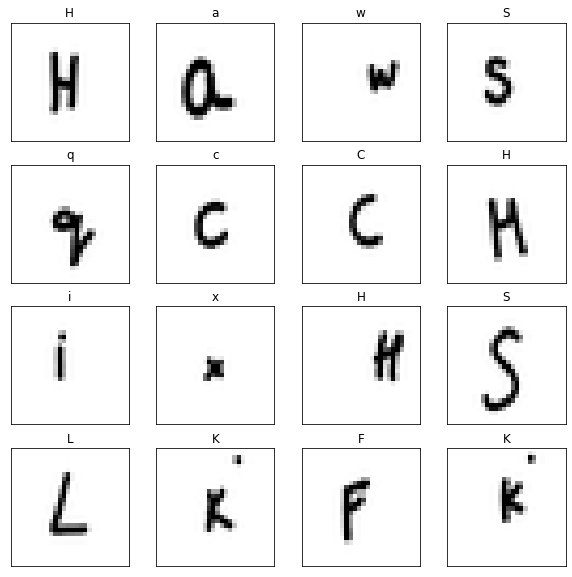

In [8]:

my_list=random.sample(range(len(Y_train)), 16)
fig, ax = plt.subplots(4, 4, figsize=(10, 10))  
for i in range(len(ax)): 
    for j in range(len(ax[i])):
        ax[i,j].imshow(X_train[my_list[4*i+j]][0], cmap='gray', interpolation='none')
        ax[i,j].axes.get_xaxis().set_visible(False)
        ax[i,j].axes.get_yaxis().set_visible(False)
        ax[i,j].set_title(character_print(Y_train[my_list[4*i+j]]))
        

# Defining our CNN model
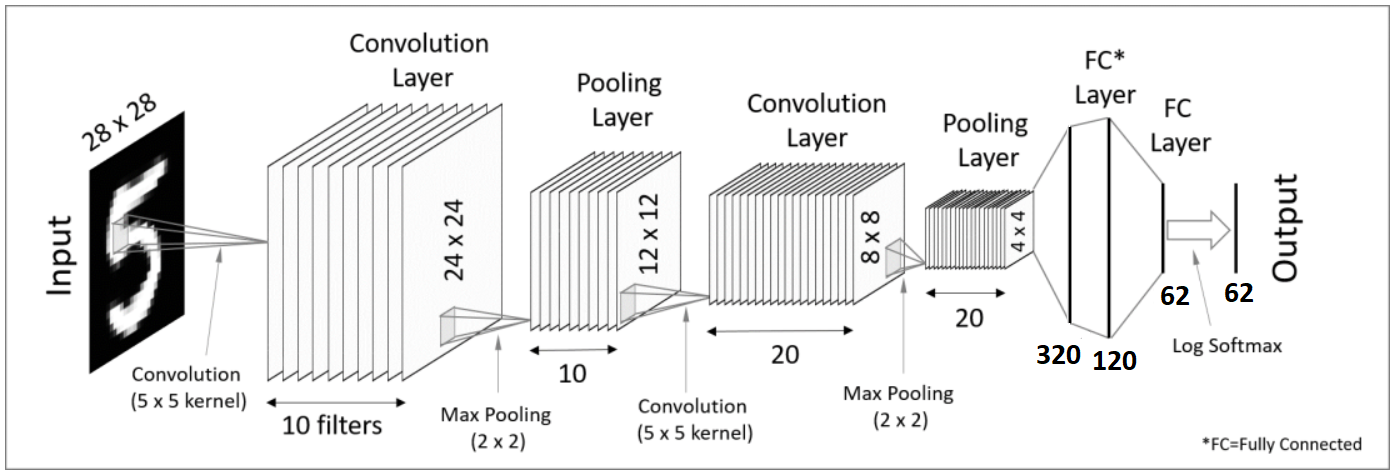

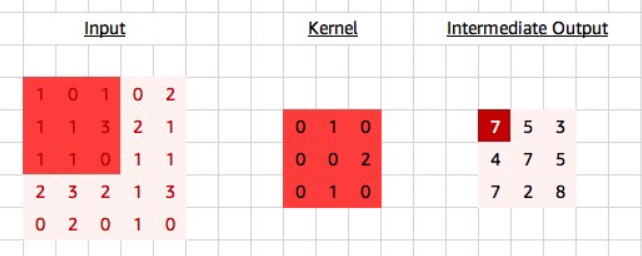

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 120)
        self.fc2 = nn.Linear(120, 62)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        dim=x
        return F.log_softmax(x)

network = Net()


# Configuring the network parameter

In [10]:
learning_rate = 0.1
momentum = 0.9
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

# Traininig the Model

In [11]:
 
train_losses = []
for epoch in range(1, 1000):
    network.train()
    optimizer.zero_grad()
    output = network(X_train)
    loss = F.nll_loss(output, Y_train)
    loss.backward()
    train_losses.append(loss)
    print("Epoch = " + str(epoch) + "    Loss = " + str(round(float(loss),2)))
    optimizer.step()

C:\Users\mohammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch = 1    Loss = 4.13
Epoch = 2    Loss = 4.13
Epoch = 3    Loss = 4.13
Epoch = 4    Loss = 4.13
Epoch = 5    Loss = 4.13
Epoch = 6    Loss = 4.13
Epoch = 7    Loss = 4.13
Epoch = 8    Loss = 4.13
Epoch = 9    Loss = 4.13
Epoch = 10    Loss = 4.13
Epoch = 11    Loss = 4.13
Epoch = 12    Loss = 4.13
Epoch = 13    Loss = 4.13
Epoch = 14    Loss = 4.13
Epoch = 15    Loss = 4.13
Epoch = 16    Loss = 4.13
Epoch = 17    Loss = 4.13
Epoch = 18    Loss = 4.13
Epoch = 19    Loss = 4.13
Epoch = 20    Loss = 4.13
Epoch = 21    Loss = 4.13
Epoch = 22    Loss = 4.12
Epoch = 23    Loss = 4.12
Epoch = 24    Loss = 4.12
Epoch = 25    Loss = 4.12
Epoch = 26    Loss = 4.12
Epoch = 27    Loss = 4.12
Epoch = 28    Loss = 4.12
Epoch = 29    Loss = 4.12
Epoch = 30    Loss = 4.12
Epoch = 31    Loss = 4.12
Epoch = 32    Loss = 4.12
Epoch = 33    Loss = 4.12
Epoch = 34    Loss = 4.12
Epoch = 35    Loss = 4.12
Epoch = 36    Loss = 4.12
Epoch = 37    Loss = 4.12
Epoch = 38    Loss = 4.12
Epoch = 39    Loss = 

Epoch = 309    Loss = 1.2
Epoch = 310    Loss = 1.11
Epoch = 311    Loss = 1.14
Epoch = 312    Loss = 1.17
Epoch = 313    Loss = 1.13
Epoch = 314    Loss = 1.17
Epoch = 315    Loss = 1.12
Epoch = 316    Loss = 1.15
Epoch = 317    Loss = 1.1
Epoch = 318    Loss = 1.12
Epoch = 319    Loss = 1.16
Epoch = 320    Loss = 1.12
Epoch = 321    Loss = 1.14
Epoch = 322    Loss = 1.12
Epoch = 323    Loss = 1.15
Epoch = 324    Loss = 1.13
Epoch = 325    Loss = 1.13
Epoch = 326    Loss = 1.12
Epoch = 327    Loss = 1.14
Epoch = 328    Loss = 1.13
Epoch = 329    Loss = 1.13
Epoch = 330    Loss = 1.13
Epoch = 331    Loss = 1.12
Epoch = 332    Loss = 1.13
Epoch = 333    Loss = 1.11
Epoch = 334    Loss = 1.12
Epoch = 335    Loss = 1.1
Epoch = 336    Loss = 1.1
Epoch = 337    Loss = 1.11
Epoch = 338    Loss = 1.08
Epoch = 339    Loss = 1.1
Epoch = 340    Loss = 1.06
Epoch = 341    Loss = 1.09
Epoch = 342    Loss = 1.06
Epoch = 343    Loss = 1.11
Epoch = 344    Loss = 1.1
Epoch = 345    Loss = 1.05
Epoch =

Epoch = 613    Loss = 0.7
Epoch = 614    Loss = 0.72
Epoch = 615    Loss = 0.71
Epoch = 616    Loss = 0.71
Epoch = 617    Loss = 0.71
Epoch = 618    Loss = 0.75
Epoch = 619    Loss = 0.71
Epoch = 620    Loss = 0.72
Epoch = 621    Loss = 0.75
Epoch = 622    Loss = 0.73
Epoch = 623    Loss = 0.74
Epoch = 624    Loss = 0.69
Epoch = 625    Loss = 0.73
Epoch = 626    Loss = 0.72
Epoch = 627    Loss = 0.71
Epoch = 628    Loss = 0.71
Epoch = 629    Loss = 0.74
Epoch = 630    Loss = 0.72
Epoch = 631    Loss = 0.71
Epoch = 632    Loss = 0.72
Epoch = 633    Loss = 0.69
Epoch = 634    Loss = 0.73
Epoch = 635    Loss = 0.7
Epoch = 636    Loss = 0.73
Epoch = 637    Loss = 0.69
Epoch = 638    Loss = 0.71
Epoch = 639    Loss = 0.72
Epoch = 640    Loss = 0.7
Epoch = 641    Loss = 0.7
Epoch = 642    Loss = 0.68
Epoch = 643    Loss = 0.7
Epoch = 644    Loss = 0.67
Epoch = 645    Loss = 0.67
Epoch = 646    Loss = 0.68
Epoch = 647    Loss = 0.7
Epoch = 648    Loss = 0.71
Epoch = 649    Loss = 0.71
Epoch =

Epoch = 918    Loss = 0.57
Epoch = 919    Loss = 0.57
Epoch = 920    Loss = 0.57
Epoch = 921    Loss = 0.58
Epoch = 922    Loss = 0.58
Epoch = 923    Loss = 0.56
Epoch = 924    Loss = 0.59
Epoch = 925    Loss = 0.55
Epoch = 926    Loss = 0.57
Epoch = 927    Loss = 0.6
Epoch = 928    Loss = 0.54
Epoch = 929    Loss = 0.56
Epoch = 930    Loss = 0.58
Epoch = 931    Loss = 0.56
Epoch = 932    Loss = 0.59
Epoch = 933    Loss = 0.6
Epoch = 934    Loss = 0.57
Epoch = 935    Loss = 0.56
Epoch = 936    Loss = 0.58
Epoch = 937    Loss = 0.57
Epoch = 938    Loss = 0.6
Epoch = 939    Loss = 0.57
Epoch = 940    Loss = 0.55
Epoch = 941    Loss = 0.55
Epoch = 942    Loss = 0.57
Epoch = 943    Loss = 0.59
Epoch = 944    Loss = 0.58
Epoch = 945    Loss = 0.59
Epoch = 946    Loss = 0.61
Epoch = 947    Loss = 0.6
Epoch = 948    Loss = 0.58
Epoch = 949    Loss = 0.58
Epoch = 950    Loss = 0.55
Epoch = 951    Loss = 0.61
Epoch = 952    Loss = 0.56
Epoch = 953    Loss = 0.57
Epoch = 954    Loss = 0.58
Epoch

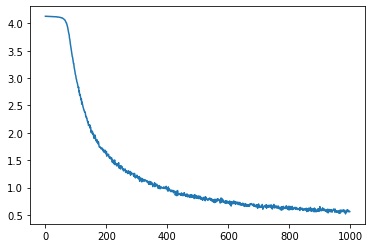

In [12]:
plt.plot(train_losses)

# Testing the trained model

In [13]:
network.eval()
test_loss = 0
correct = 0
output = network(X_test)
test_loss += F.nll_loss(output, Y_test, size_average=False).item()
pred = output.data.max(1, keepdim=True)[1]
correct += pred.eq(Y_test.data.view_as(pred)).sum()


print("correct: " + str(correct))
print("Accuracy: " + str(100*float(correct)/len(Y_test)))

C:\Users\mohammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\mohammad\Anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


correct: tensor(517)
Accuracy: 75.80645161290323


C:\Users\mohammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


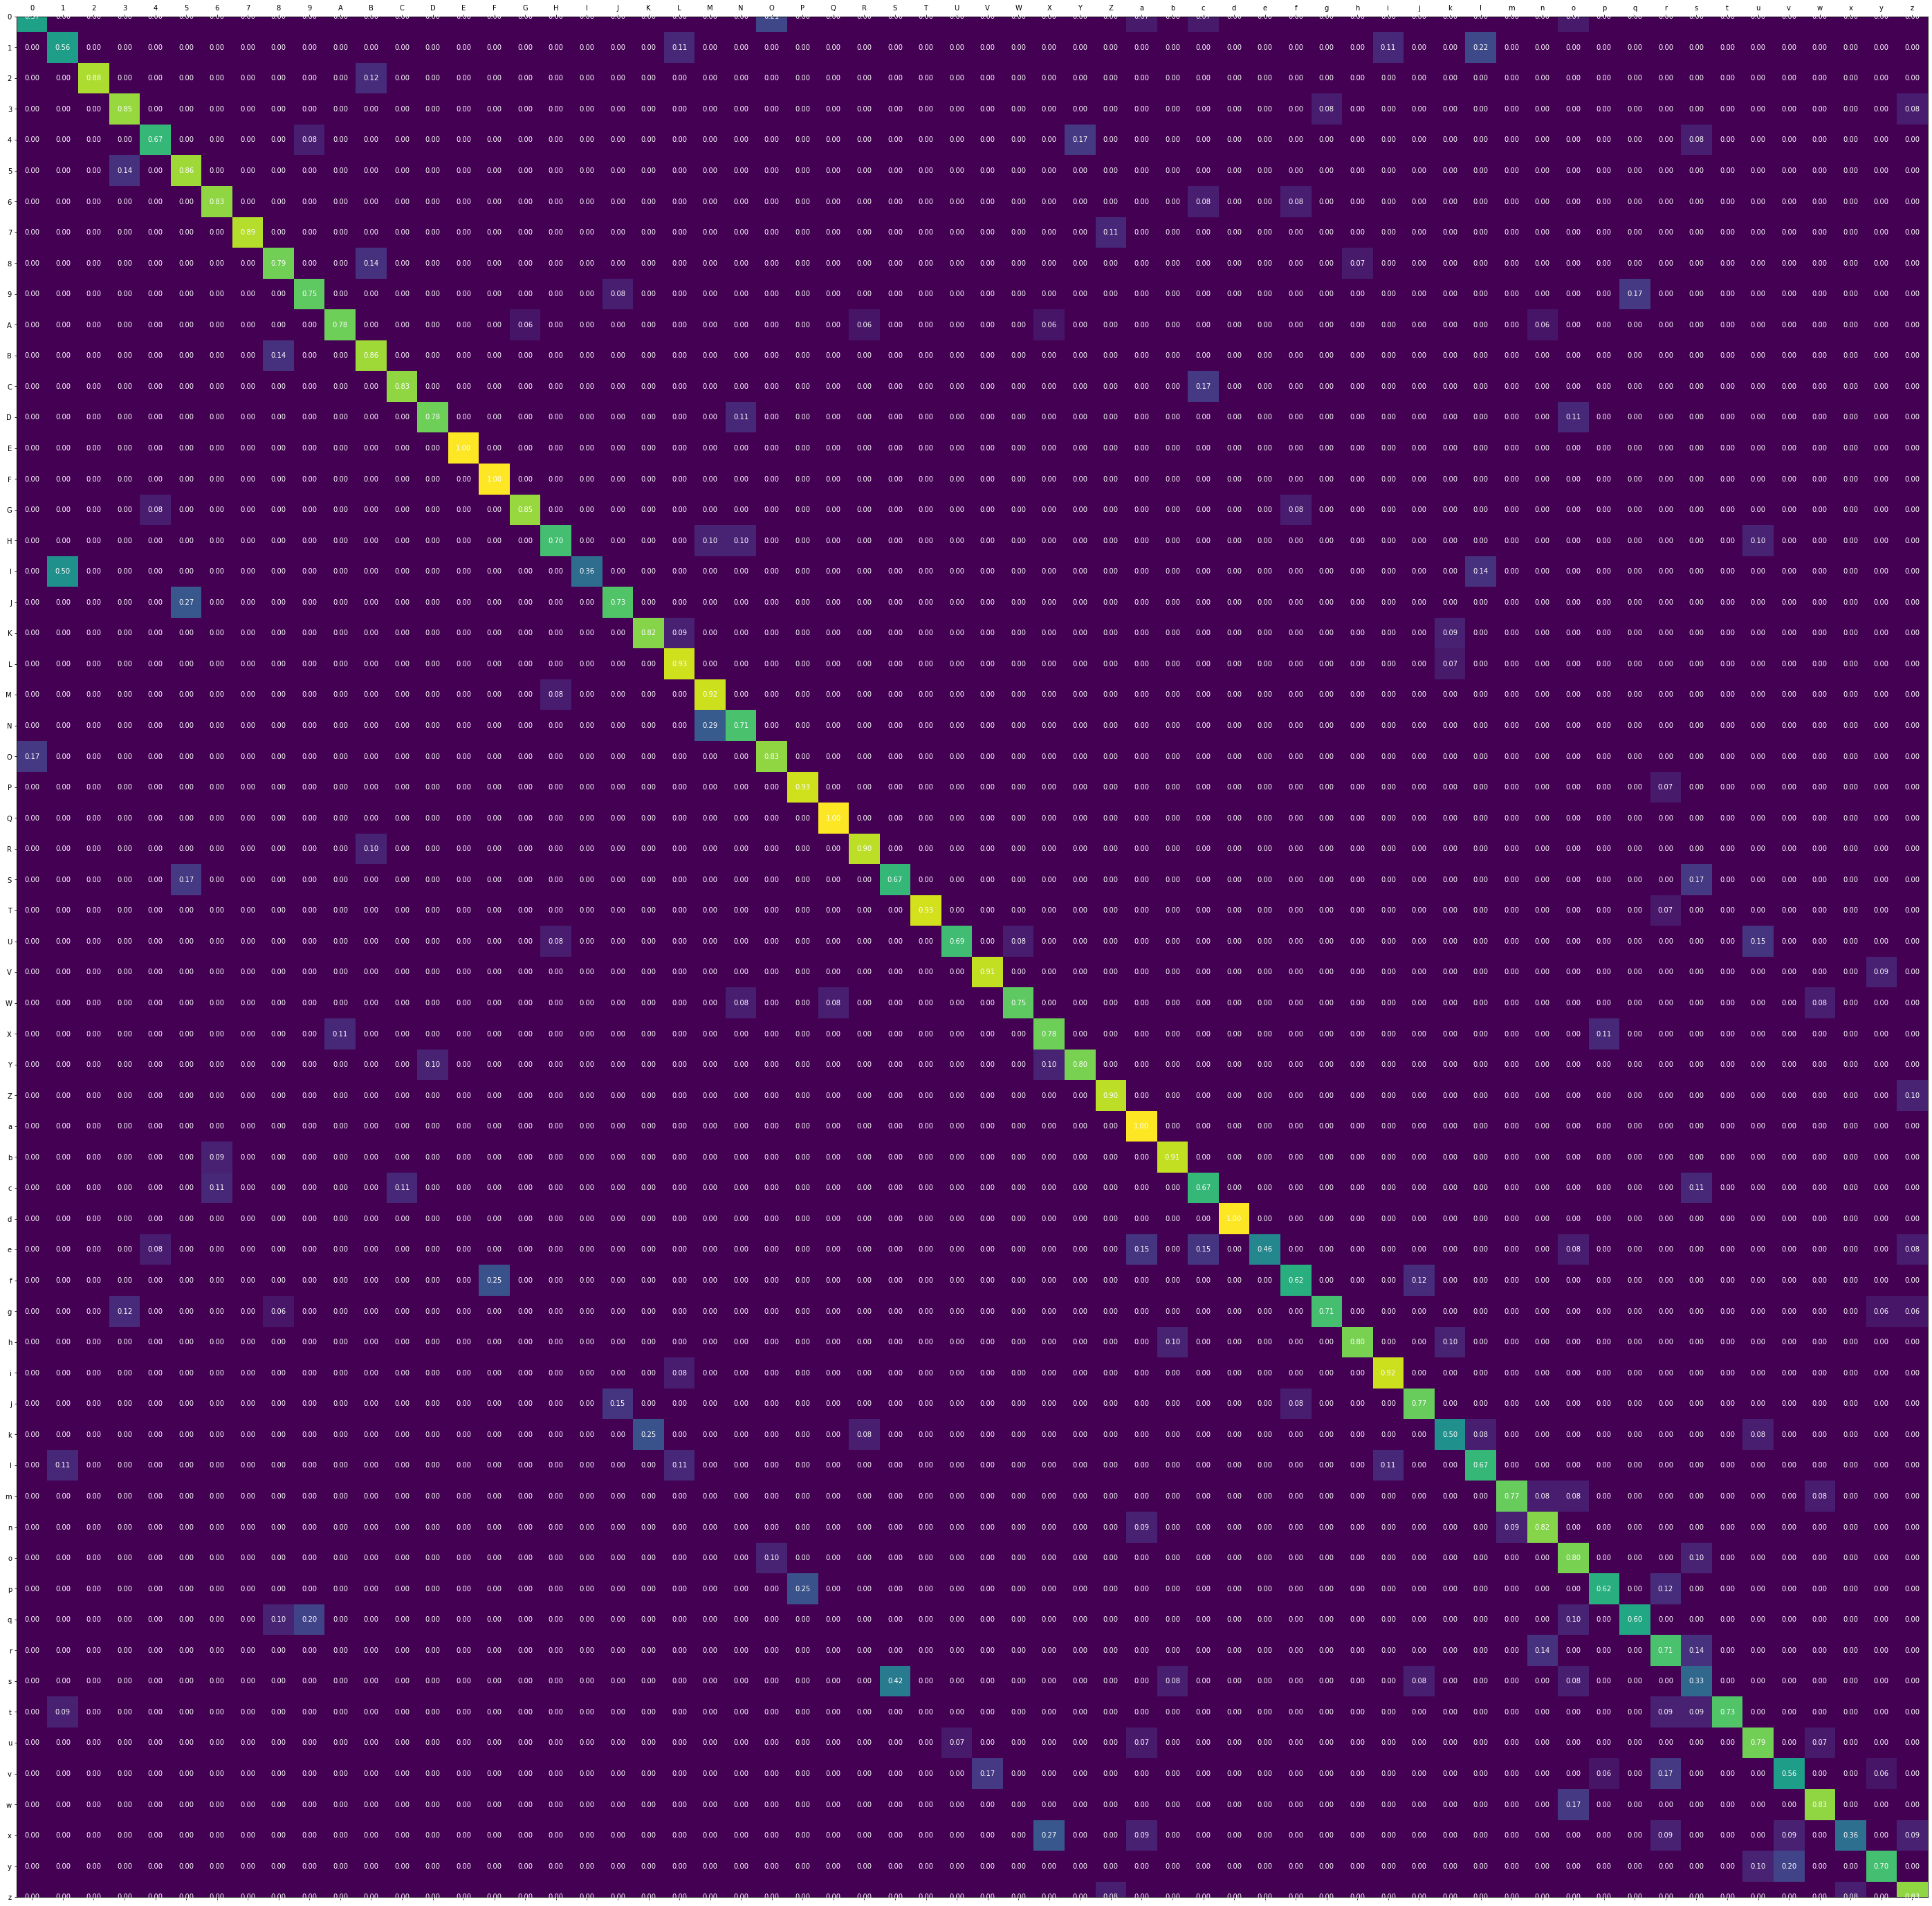

In [14]:
CM = np.zeros((62,62),dtype = float) 

y = ["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
x = ["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]


for i in range(len(Y_test)):
    output = network(X_test[i:i+1][0:1][0:28][0:28])
    output.data.max(1, keepdim=True)[1]
    CM[Y_test[i]][output.data.max(1, keepdim=True)[1]] = CM[Y_test[i]][output.data.max(1, keepdim=True)[1]] + 1
    
CM_SUM = CM.sum(axis=1)

for i in range(62):
    for j in range(62):
        CM[i][j] =  CM[i][j]/CM_SUM[i]

        
fig, ax = plt.subplots(figsize=(50,50))
im = ax.matshow(CM)

ax.set_xticks(np.arange(len(x)))
ax.set_yticks(np.arange(len(y)))
ax.set_xticklabels(x)
ax.set_yticklabels(y)

for i in range(62):
    for j in range(62):
        text = ax.text(j, i, '%.2f'%CM[i,j],ha="center", va="center", color="w")

# Miss prediction between simlar looking letters and numbers

In [15]:
counter = 0
for i in range(len(Y_test)):
    output = network(X_test[i:i+1][0:1][0:28][0:28])
    pred = output.data.max(1, keepdim=True)[1]
    if(Y_test[i] == 0 and (pred == 24 or pred == 50)):
        counter = counter + 1
    if(Y_test[i] == 24 and (pred == 0 or pred == 50)):
        counter = counter + 1
    if(Y_test[i] == 50 and (pred == 24 or pred == 0)):
        counter = counter + 1
        
    if(Y_test[i] == 57 and pred == 31):
        counter = counter + 1
    if(Y_test[i] == 31 and pred == 57):
        counter = counter + 1    
    if(Y_test[i] == 1 and pred == 31):
        counter = counter + 1
        
    if(Y_test[i] == 1 and (pred == 18 or pred == 44)):
        counter = counter + 1
    if(Y_test[i] == 44 and (pred == 1 or pred == 18)):
        counter = counter + 1
    if(Y_test[i] == 18 and (pred == 44 or pred == 1)):
        counter = counter + 1  
        
    if(Y_test[i] == 34 and pred == 60):
        counter = counter + 1    
    if(Y_test[i] == 60 and pred == 34):
        counter = counter + 1
        
    if(Y_test[i] == 25 and pred == 51):
        counter = counter + 1    
    if(Y_test[i] == 51 and pred == 25):
        counter = counter + 1        

    if(Y_test[i] == 33 and pred == 59):
        counter = counter + 1    
    if(Y_test[i] == 59 and pred == 33):
        counter = counter + 1   
        
print("Interchangeably predicted: " + str(100*float(counter)/len(Y_test)))

C:\Users\mohammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Interchangeably predicted: 3.225806451612903


# Showing some sample pictures with the predicted class

C:\Users\mohammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


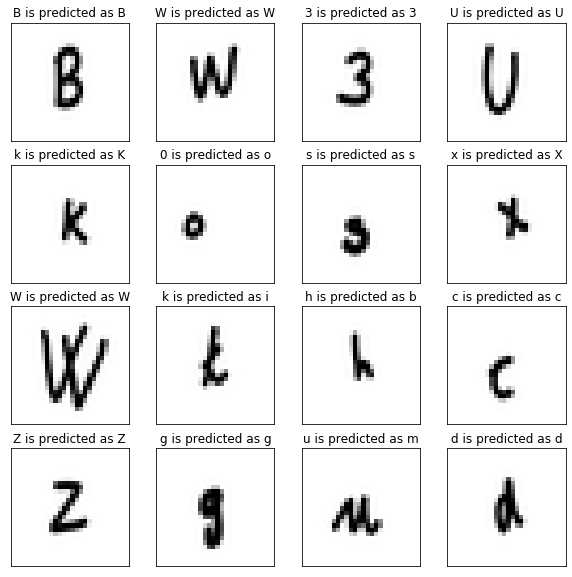

In [28]:
my_list=random.sample(range(len(Y_test)), 16)
fig, ax = plt.subplots(4, 4, figsize=(10, 10))  
for i in range(len(ax)): 
    for j in range(len(ax[i])):
        output = network(X_test[my_list[4*i+j]:my_list[4*i+j]+1][0:1][0:28][0:28])
        output.data.max(1, keepdim=True)[1]
        
        ax[i,j].imshow(X_test[my_list[4*i+j]][0], cmap='gray', interpolation='none')
        ax[i,j].axes.get_xaxis().set_visible(False)
        ax[i,j].axes.get_yaxis().set_visible(False)
        ax[i,j].set_title(character_print(Y_test[my_list[4*i+j]]) + " is predicted as " + character_print(output.data.max(1, keepdim=True)[1]))
        

# Trying another CNN architecture

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=4)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(800, 200)
        self.fc2 = nn.Linear(200, 62)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 800)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        dim=x
        return F.log_softmax(x)

network = Net()

learning_rate = 0.1
momentum = 0.9
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

In [18]:
train_losses = []
for epoch in range(1, 1000):
    network.train()
    optimizer.zero_grad()
    output = network(X_train)
    loss = F.nll_loss(output, Y_train)
    loss.backward()
    train_losses.append(loss)
    print("Epoch = " + str(epoch) + "    Loss = " + str(round(float(loss),2)))
    optimizer.step()

C:\Users\mohammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch = 1    Loss = 4.13
Epoch = 2    Loss = 4.13
Epoch = 3    Loss = 4.13
Epoch = 4    Loss = 4.13
Epoch = 5    Loss = 4.13
Epoch = 6    Loss = 4.13
Epoch = 7    Loss = 4.13
Epoch = 8    Loss = 4.13
Epoch = 9    Loss = 4.13
Epoch = 10    Loss = 4.13
Epoch = 11    Loss = 4.13
Epoch = 12    Loss = 4.13
Epoch = 13    Loss = 4.13
Epoch = 14    Loss = 4.13
Epoch = 15    Loss = 4.13
Epoch = 16    Loss = 4.13
Epoch = 17    Loss = 4.12
Epoch = 18    Loss = 4.13
Epoch = 19    Loss = 4.12
Epoch = 20    Loss = 4.12
Epoch = 21    Loss = 4.12
Epoch = 22    Loss = 4.12
Epoch = 23    Loss = 4.12
Epoch = 24    Loss = 4.12
Epoch = 25    Loss = 4.12
Epoch = 26    Loss = 4.12
Epoch = 27    Loss = 4.12
Epoch = 28    Loss = 4.12
Epoch = 29    Loss = 4.12
Epoch = 30    Loss = 4.12
Epoch = 31    Loss = 4.12
Epoch = 32    Loss = 4.12
Epoch = 33    Loss = 4.12
Epoch = 34    Loss = 4.12
Epoch = 35    Loss = 4.12
Epoch = 36    Loss = 4.12
Epoch = 37    Loss = 4.12
Epoch = 38    Loss = 4.11
Epoch = 39    Loss = 

Epoch = 309    Loss = 0.64
Epoch = 310    Loss = 0.67
Epoch = 311    Loss = 0.66
Epoch = 312    Loss = 0.66
Epoch = 313    Loss = 0.65
Epoch = 314    Loss = 0.63
Epoch = 315    Loss = 0.62
Epoch = 316    Loss = 0.63
Epoch = 317    Loss = 0.62
Epoch = 318    Loss = 0.62
Epoch = 319    Loss = 0.62
Epoch = 320    Loss = 0.6
Epoch = 321    Loss = 0.61
Epoch = 322    Loss = 0.6
Epoch = 323    Loss = 0.63
Epoch = 324    Loss = 0.63
Epoch = 325    Loss = 0.6
Epoch = 326    Loss = 0.62
Epoch = 327    Loss = 0.62
Epoch = 328    Loss = 0.59
Epoch = 329    Loss = 0.6
Epoch = 330    Loss = 0.6
Epoch = 331    Loss = 0.59
Epoch = 332    Loss = 0.61
Epoch = 333    Loss = 0.59
Epoch = 334    Loss = 0.6
Epoch = 335    Loss = 0.61
Epoch = 336    Loss = 0.58
Epoch = 337    Loss = 0.6
Epoch = 338    Loss = 0.56
Epoch = 339    Loss = 0.57
Epoch = 340    Loss = 0.6
Epoch = 341    Loss = 0.59
Epoch = 342    Loss = 0.54
Epoch = 343    Loss = 0.59
Epoch = 344    Loss = 0.57
Epoch = 345    Loss = 0.55
Epoch = 3

Epoch = 613    Loss = 0.35
Epoch = 614    Loss = 0.33
Epoch = 615    Loss = 0.35
Epoch = 616    Loss = 0.36
Epoch = 617    Loss = 0.35
Epoch = 618    Loss = 0.35
Epoch = 619    Loss = 0.33
Epoch = 620    Loss = 0.34
Epoch = 621    Loss = 0.34
Epoch = 622    Loss = 0.34
Epoch = 623    Loss = 0.33
Epoch = 624    Loss = 0.35
Epoch = 625    Loss = 0.35
Epoch = 626    Loss = 0.35
Epoch = 627    Loss = 0.33
Epoch = 628    Loss = 0.34
Epoch = 629    Loss = 0.32
Epoch = 630    Loss = 0.31
Epoch = 631    Loss = 0.31
Epoch = 632    Loss = 0.32
Epoch = 633    Loss = 0.34
Epoch = 634    Loss = 0.32
Epoch = 635    Loss = 0.33
Epoch = 636    Loss = 0.32
Epoch = 637    Loss = 0.33
Epoch = 638    Loss = 0.31
Epoch = 639    Loss = 0.3
Epoch = 640    Loss = 0.33
Epoch = 641    Loss = 0.35
Epoch = 642    Loss = 0.33
Epoch = 643    Loss = 0.34
Epoch = 644    Loss = 0.34
Epoch = 645    Loss = 0.31
Epoch = 646    Loss = 0.33
Epoch = 647    Loss = 0.3
Epoch = 648    Loss = 0.32
Epoch = 649    Loss = 0.33
Epo

Epoch = 917    Loss = 0.26
Epoch = 918    Loss = 0.24
Epoch = 919    Loss = 0.26
Epoch = 920    Loss = 0.23
Epoch = 921    Loss = 0.27
Epoch = 922    Loss = 0.26
Epoch = 923    Loss = 0.25
Epoch = 924    Loss = 0.23
Epoch = 925    Loss = 0.26
Epoch = 926    Loss = 0.23
Epoch = 927    Loss = 0.24
Epoch = 928    Loss = 0.26
Epoch = 929    Loss = 0.24
Epoch = 930    Loss = 0.25
Epoch = 931    Loss = 0.25
Epoch = 932    Loss = 0.26
Epoch = 933    Loss = 0.25
Epoch = 934    Loss = 0.25
Epoch = 935    Loss = 0.24
Epoch = 936    Loss = 0.24
Epoch = 937    Loss = 0.25
Epoch = 938    Loss = 0.26
Epoch = 939    Loss = 0.26
Epoch = 940    Loss = 0.25
Epoch = 941    Loss = 0.25
Epoch = 942    Loss = 0.26
Epoch = 943    Loss = 0.23
Epoch = 944    Loss = 0.23
Epoch = 945    Loss = 0.22
Epoch = 946    Loss = 0.26
Epoch = 947    Loss = 0.23
Epoch = 948    Loss = 0.24
Epoch = 949    Loss = 0.23
Epoch = 950    Loss = 0.25
Epoch = 951    Loss = 0.21
Epoch = 952    Loss = 0.24
Epoch = 953    Loss = 0.24
E

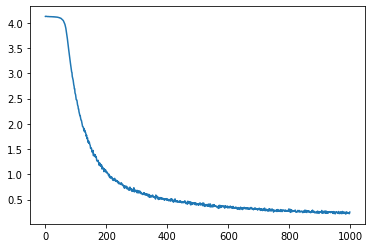

In [19]:
plt.plot(train_losses)

In [20]:
network.eval()
test_loss = 0
correct = 0
output = network(X_test)
test_loss += F.nll_loss(output, Y_test, size_average=False).item()
pred = output.data.max(1, keepdim=True)[1]
correct += pred.eq(Y_test.data.view_as(pred)).sum()


print("correct: " + str(correct))
print("Accuracy: " + str(100*float(correct)/len(Y_test)))

C:\Users\mohammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


correct: tensor(522)
Accuracy: 76.53958944281526


In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=4)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(800, 200)
        self.fc2 = nn.Linear(200, 62)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 800)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        dim=x
        return F.log_softmax(x)

network = Net()

learning_rate = 0.05
momentum = 0.95
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)


In [22]:
train_losses = []
for epoch in range(1, 1000):
    network.train()
    optimizer.zero_grad()
    output = network(X_train)
    loss = F.nll_loss(output, Y_train)
    loss.backward()
    train_losses.append(loss)
    print("Epoch = " + str(epoch) + "    Loss = " + str(round(float(loss),2)))
    optimizer.step()

C:\Users\mohammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch = 1    Loss = 4.13
Epoch = 2    Loss = 4.13
Epoch = 3    Loss = 4.13
Epoch = 4    Loss = 4.13
Epoch = 5    Loss = 4.13
Epoch = 6    Loss = 4.13
Epoch = 7    Loss = 4.13
Epoch = 8    Loss = 4.13
Epoch = 9    Loss = 4.13
Epoch = 10    Loss = 4.13
Epoch = 11    Loss = 4.13
Epoch = 12    Loss = 4.13
Epoch = 13    Loss = 4.13
Epoch = 14    Loss = 4.13
Epoch = 15    Loss = 4.13
Epoch = 16    Loss = 4.13
Epoch = 17    Loss = 4.13
Epoch = 18    Loss = 4.13
Epoch = 19    Loss = 4.13
Epoch = 20    Loss = 4.13
Epoch = 21    Loss = 4.13
Epoch = 22    Loss = 4.13
Epoch = 23    Loss = 4.13
Epoch = 24    Loss = 4.13
Epoch = 25    Loss = 4.13
Epoch = 26    Loss = 4.13
Epoch = 27    Loss = 4.13
Epoch = 28    Loss = 4.12
Epoch = 29    Loss = 4.13
Epoch = 30    Loss = 4.12
Epoch = 31    Loss = 4.12
Epoch = 32    Loss = 4.12
Epoch = 33    Loss = 4.12
Epoch = 34    Loss = 4.12
Epoch = 35    Loss = 4.12
Epoch = 36    Loss = 4.12
Epoch = 37    Loss = 4.12
Epoch = 38    Loss = 4.12
Epoch = 39    Loss = 

Epoch = 309    Loss = 0.9
Epoch = 310    Loss = 0.88
Epoch = 311    Loss = 0.88
Epoch = 312    Loss = 0.87
Epoch = 313    Loss = 0.8
Epoch = 314    Loss = 0.85
Epoch = 315    Loss = 0.85
Epoch = 316    Loss = 0.87
Epoch = 317    Loss = 0.83
Epoch = 318    Loss = 0.84
Epoch = 319    Loss = 0.86
Epoch = 320    Loss = 0.87
Epoch = 321    Loss = 0.82
Epoch = 322    Loss = 0.83
Epoch = 323    Loss = 0.84
Epoch = 324    Loss = 0.83
Epoch = 325    Loss = 0.82
Epoch = 326    Loss = 0.79
Epoch = 327    Loss = 0.85
Epoch = 328    Loss = 0.81
Epoch = 329    Loss = 0.81
Epoch = 330    Loss = 0.82
Epoch = 331    Loss = 0.81
Epoch = 332    Loss = 0.81
Epoch = 333    Loss = 0.79
Epoch = 334    Loss = 0.79
Epoch = 335    Loss = 0.78
Epoch = 336    Loss = 0.78
Epoch = 337    Loss = 0.78
Epoch = 338    Loss = 0.8
Epoch = 339    Loss = 0.8
Epoch = 340    Loss = 0.79
Epoch = 341    Loss = 0.8
Epoch = 342    Loss = 0.76
Epoch = 343    Loss = 0.79
Epoch = 344    Loss = 0.78
Epoch = 345    Loss = 0.8
Epoch =

Epoch = 613    Loss = 0.45
Epoch = 614    Loss = 0.43
Epoch = 615    Loss = 0.42
Epoch = 616    Loss = 0.42
Epoch = 617    Loss = 0.43
Epoch = 618    Loss = 0.41
Epoch = 619    Loss = 0.45
Epoch = 620    Loss = 0.45
Epoch = 621    Loss = 0.44
Epoch = 622    Loss = 0.41
Epoch = 623    Loss = 0.42
Epoch = 624    Loss = 0.39
Epoch = 625    Loss = 0.45
Epoch = 626    Loss = 0.43
Epoch = 627    Loss = 0.44
Epoch = 628    Loss = 0.41
Epoch = 629    Loss = 0.41
Epoch = 630    Loss = 0.47
Epoch = 631    Loss = 0.4
Epoch = 632    Loss = 0.44
Epoch = 633    Loss = 0.45
Epoch = 634    Loss = 0.4
Epoch = 635    Loss = 0.42
Epoch = 636    Loss = 0.43
Epoch = 637    Loss = 0.41
Epoch = 638    Loss = 0.41
Epoch = 639    Loss = 0.42
Epoch = 640    Loss = 0.41
Epoch = 641    Loss = 0.41
Epoch = 642    Loss = 0.44
Epoch = 643    Loss = 0.43
Epoch = 644    Loss = 0.39
Epoch = 645    Loss = 0.43
Epoch = 646    Loss = 0.4
Epoch = 647    Loss = 0.42
Epoch = 648    Loss = 0.38
Epoch = 649    Loss = 0.42
Epoc

Epoch = 918    Loss = 0.31
Epoch = 919    Loss = 0.3
Epoch = 920    Loss = 0.31
Epoch = 921    Loss = 0.29
Epoch = 922    Loss = 0.31
Epoch = 923    Loss = 0.3
Epoch = 924    Loss = 0.3
Epoch = 925    Loss = 0.3
Epoch = 926    Loss = 0.27
Epoch = 927    Loss = 0.29
Epoch = 928    Loss = 0.28
Epoch = 929    Loss = 0.3
Epoch = 930    Loss = 0.29
Epoch = 931    Loss = 0.28
Epoch = 932    Loss = 0.28
Epoch = 933    Loss = 0.28
Epoch = 934    Loss = 0.29
Epoch = 935    Loss = 0.32
Epoch = 936    Loss = 0.29
Epoch = 937    Loss = 0.28
Epoch = 938    Loss = 0.29
Epoch = 939    Loss = 0.29
Epoch = 940    Loss = 0.28
Epoch = 941    Loss = 0.29
Epoch = 942    Loss = 0.3
Epoch = 943    Loss = 0.27
Epoch = 944    Loss = 0.29
Epoch = 945    Loss = 0.29
Epoch = 946    Loss = 0.27
Epoch = 947    Loss = 0.3
Epoch = 948    Loss = 0.29
Epoch = 949    Loss = 0.29
Epoch = 950    Loss = 0.28
Epoch = 951    Loss = 0.27
Epoch = 952    Loss = 0.27
Epoch = 953    Loss = 0.29
Epoch = 954    Loss = 0.28
Epoch = 

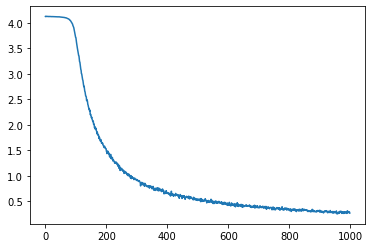

In [23]:
plt.plot(train_losses)

In [24]:
network.eval()
test_loss = 0
correct = 0
output = network(X_test)
test_loss += F.nll_loss(output, Y_test, size_average=False).item()
pred = output.data.max(1, keepdim=True)[1]
correct += pred.eq(Y_test.data.view_as(pred)).sum()


print("correct: " + str(correct))
print("Accuracy: " + str(100*float(correct)/len(Y_test)))

C:\Users\mohammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


correct: tensor(510)
Accuracy: 74.7800586510264


C:\Users\mohammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


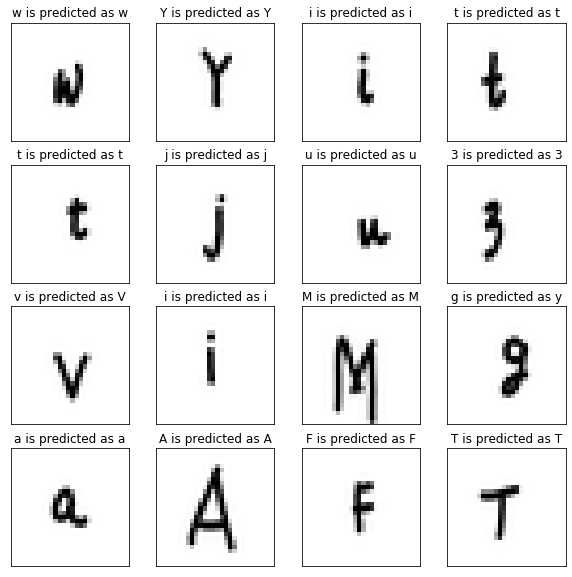

In [26]:
my_list=random.sample(range(len(Y_test)), 16)
fig, ax = plt.subplots(4, 4, figsize=(10, 10))  
for i in range(len(ax)): 
    for j in range(len(ax[i])):
        output = network(X_test[my_list[4*i+j]:my_list[4*i+j]+1][0:1][0:28][0:28])
        output.data.max(1, keepdim=True)[1]
        
        ax[i,j].imshow(X_test[my_list[4*i+j]][0], cmap='gray', interpolation='none')
        ax[i,j].axes.get_xaxis().set_visible(False)
        ax[i,j].axes.get_yaxis().set_visible(False)
        ax[i,j].set_title(character_print(Y_test[my_list[4*i+j]]) + " is predicted as " + character_print(output.data.max(1, keepdim=True)[1]))
        